In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
SPY_data = pd.read_csv("SPY_regression.csv")
SPY_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
# Change the Date column from object to datetime object 
SPY_data["Date"] = pd.to_datetime(SPY_data["Date"])
# Preview the data
SPY_data.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,3.587980e+09,2086.590088


In [4]:
# Set Date as index
SPY_data.set_index('Date',inplace=True)
 
# Reverse the order of the dataframe in order to have oldest values at top
SPY_data.sort_values('Date',ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,3.991400e+09,1132.989990
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,2.491020e+09,1136.520020
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,1137.140015
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,1141.689941
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,1144.979980
2010-01-11,1145.959961,1149.739990,1142.020020,1146.979980,4.255780e+09,1146.979980
2010-01-12,1143.810059,1143.810059,1131.770020,1136.219971,4.716160e+09,1136.219971
2010-01-13,1137.310059,1148.400024,1133.180054,1145.680054,4.170360e+09,1145.680054
2010-01-14,1145.680054,1150.410034,1143.800049,1148.459961,3.915200e+09,1148.459961


In [5]:
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()   #pct_change() function calculates the percentage change between the current and a prior element.This function by default calculates the percentage change from the immediately previous row.
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(window= 5).std().shift(periods=1)
 
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(window=5).mean().shift(periods=1)
SPY_data['volume Close'] = SPY_data["Volume"].rolling(window=5).std().shift(periods=1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

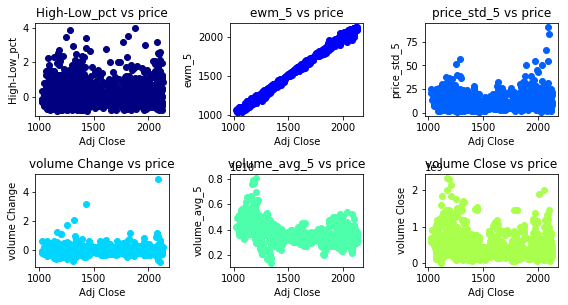

In [6]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))  # try 
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()
        
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = SPY_data.columns[-6:]  
 
correlation(SPY_data,variables,3,3)

In [7]:
SPY_data.head()

,Open,High,Low,Close,Volume,Adj Close,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
Date,,,,,,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,0.001172,2085.841992,NaN,0.021728,NaN,NaN
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN


In [8]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.071823
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

In [9]:
SPY_data.isnull().sum().loc[variables]

High-Low_pct     1
ewm_5            1
price_std_5      5
volume Change    1
volume_avg_5     5
volume Close     5
dtype: int64

In [10]:
# To train the model is necessary to drop any missing value in the dataset.
SPY_data = SPY_data.dropna(axis=0)

In [11]:
# Generate the train and test sets

train = SPY_data[SPY_data.index < datetime(year=2015, month=1, day=1)]

test = SPY_data[SPY_data.index >= datetime(year=2015, month=1, day=1)]

In [12]:
lr = LinearRegression()
 
X_train = train[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]]
 
Y_train = train["Adj Close"]
 
lr.fit(X_train,Y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# Create the test features dataset (X_test) which will be used to make the predictions.

X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values 

# The labels of the model

Y_test = test["Adj Close"].values 

In [14]:
y_pred = lr.predict(X_test)   
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))



Mean Absolute Error: 17.382532860811303
Mean Squared Error: 531.0111069728091
Root Mean Squared Error: 23.043678243127964
